## 7.5. Capraz Dogrulama - Odev

In [62]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [75]:
titanic = pd.read_csv('titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
print(titanic.shape)

(891, 12)


In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [78]:
titanic = titanic.drop(['Cabin'], axis=1)

In [79]:
titanic = titanic.dropna()

In [80]:
print(titanic.shape)

(712, 11)


In [81]:
titanic['Sex'] = titanic.Sex.replace({'female':1, 'male':0})

In [82]:
X = titanic[['Age','Sex','Pclass']]
Y = titanic.Survived

print(len(X),len(Y))
print('Veri kumesinde {} satir veri bulunmaktadir'.format(len(X)))

712 712
Veri kumesinde 712 satir veri bulunmaktadir


In [83]:
X_egitim,X_test,Y_egitim,Y_test = train_test_split(X,Y, test_size = 0.2)
print('Egitim kumesindeki satir sayisi {}'.format(len(X_egitim)))
print('Egitim kumesindeki hedef sayisi {}'.format(len(Y_egitim)))
print('Test kumesindeki satir sayisi {}'.format(len(X_test)))
print('Test kumesindeki hedef sayisi {}'.format(len(Y_test)))

Egitim kumesindeki satir sayisi 569
Egitim kumesindeki hedef sayisi 569
Test kumesindeki satir sayisi 143
Test kumesindeki hedef sayisi 143


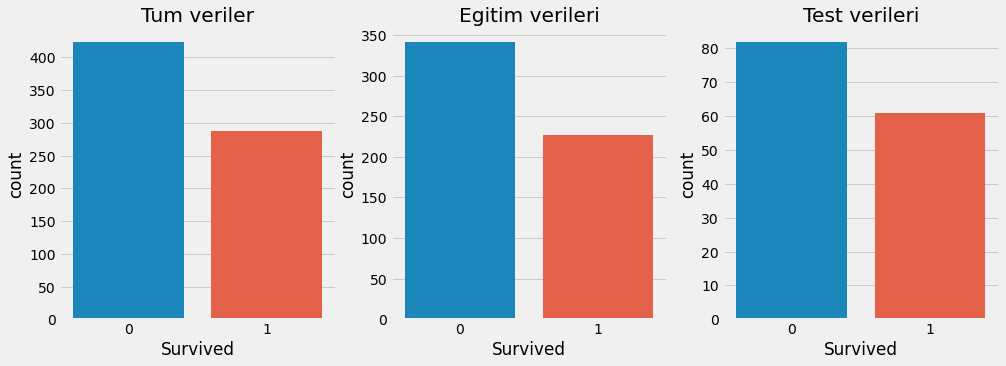

Tum veri kumesi '0' yuzdesi: %60
Test verisi '0' yüzdesi: %57 
Egitim verisi '0' yüzdesi: %60 


In [84]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sns.countplot(Y)
plt.title('Tum veriler')
plt.subplot(132)
sns.countplot(Y_egitim)
plt.title('Egitim verileri')
plt.subplot(133)
sns.countplot(Y_test)
plt.title('Test verileri')
plt.show()
print("Tum veri kumesi '0' yuzdesi: %{:.0f}".format(len(Y[Y==0])/len(Y)*100))
print("Test verisi '0' yüzdesi: %{:.0f} ".format(len(Y_test[Y_test==0])/len(Y_test)*100))
print("Egitim verisi '0' yüzdesi: %{:.0f} ".format(len(Y_egitim[Y_egitim==0])/len(Y_egitim)*100))

In [85]:
# Dagilimlar birbirine cok yakin ama yine de konuda anlatilan gibi esitlemeye calisalim

X_egitim, X_test, Y_egitim, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

print("Tüm veri kümesi '0' yüzdesi : %{:.0f} ".format(len(Y[Y==0])/len(Y)*100))
print("Test verisi '0' yüzdesi     : %{:.0f} ".format(len(Y_test[Y_test==0])/len(Y_test)*100))
print("Egitim verisi '0' yüzdesi   : %{:.0f} ".format(len(Y_egitim[Y_egitim==0])/len(Y_egitim)*100))

Tüm veri kümesi '0' yüzdesi : %60 
Test verisi '0' yüzdesi     : %59 
Egitim verisi '0' yüzdesi   : %60 


In [86]:
model = LogisticRegression()
model.fit(X_egitim, Y_egitim)
tahmin_egitim = model.predict(X_egitim)
tahmin_test = model.predict(X_test)
model.score(X_test, Y_test)

0.8391608391608392

#### K-Katlı Çapraz Doğrulama (K-Fold Cross Validation)

#### KFold ile çapraz doğrulama

In [87]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=1111)

parcalar = kf.split(X)
for num, (egitim_index, test_index) in enumerate(parcalar):
    print("{}.Egitim Kümesi Boyutu : {}".format(num+1,len(egitim_index)))
    print("{}.Test Kümesi Boyutu   : {}".format(num+1,len(test_index)))
    print('-'*27)

1.Egitim Kümesi Boyutu : 569
1.Test Kümesi Boyutu   : 143
---------------------------
2.Egitim Kümesi Boyutu : 569
2.Test Kümesi Boyutu   : 143
---------------------------
3.Egitim Kümesi Boyutu : 570
3.Test Kümesi Boyutu   : 142
---------------------------
4.Egitim Kümesi Boyutu : 570
4.Test Kümesi Boyutu   : 142
---------------------------
5.Egitim Kümesi Boyutu : 570
5.Test Kümesi Boyutu   : 142
---------------------------


In [89]:
from sklearn.metrics import mean_squared_error

model2 = LogisticRegression()
parcalar = kf.split(X)
dogruluk_liste = []
for i, (egitim_indeks, test_indeks) in enumerate(parcalar):
    X_egitim, Y_egitim = X[egitim_indeks], Y[egitim_indeks]
    X_test, Y_test = X[test_indeks], Y[test_indeks]
    model2.fit(X_egitim, Y_egitim)
    tahmin = model2.predict(X_test)
    dogruluk_degeri = model.score(X_test, Y_test)  
    dogruluk_liste.append(dogruluk_degeri)
    print("{}.Parca Dogruluk Degeri: {:.2f}".format(i+1, dogruluk_degeri))
    print("-"*30)

KeyError: "None of [Int64Index([  3,   4,   5,   6,   8,   9,  10,  11,  12,  13,\n            ...\n            702, 703, 704, 705, 706, 707, 708, 709, 710, 711],\n           dtype='int64', length=569)] are in the [columns]"

#### cross_val_score ve cross_validate ile çapraz doğrulama

In [90]:
from sklearn.model_selection import cross_validate, cross_val_score

lrm = LogisticRegression()
cv = cross_validate(estimator=lrm,
                    X=X,
                    y=Y,
                    cv=10,
                    return_train_score=True,
                    )
print('Test Skorları            : ', cv['test_score'], sep = '\n')
print("-"*50)
print('Egitim Skorları          : ', cv['train_score'], sep = '\n')

Test Skorları            : 
[0.79166667 0.73611111 0.8028169  0.87323944 0.76056338 0.77464789
 0.78873239 0.76056338 0.8028169  0.78873239]
--------------------------------------------------
Egitim Skorları          : 
[0.8109375  0.8046875  0.7925117  0.78939158 0.7925117  0.80187207
 0.78939158 0.79407176 0.78783151 0.78939158]


In [91]:
print('Test Kümesi   Ortalaması : ', cv['test_score'].mean())
print('Egitim Kümesi Ortalaması : ', cv['train_score'].mean())

Test Kümesi   Ortalaması :  0.7879890453834115
Egitim Kümesi Ortalaması :  0.7952598478939158


In [93]:
cv = cross_validate(estimator=lrm, 
                     X=X,
                     y=Y,
                     cv=10,
                     return_train_score=True,
                     scoring = ['accuracy', 'precision', 'r2']
                   )
print('Test Kumesi Dogruluk Ortalaması     : {:.2f}'.format(cv['test_accuracy'].mean()))
print('Test Kumesi R-kare  Ortalaması      : {:.2f}'.format(cv['test_r2'].mean()))
print('Test Kumesi Hassasiyet Ortalaması   : {:.2f}'.format(cv['test_precision'].mean()))
print('Eğitim Kumesi Dogruluk Ortalaması   : {:.2f}'.format(cv['train_accuracy'].mean()))
print('Eğitim Kumesi R-kare  Ortalaması    : {:.2f}'.format(cv['train_r2'].mean()))
print('Eğitim Kumesi Hassasiyet Ortalaması : {:.2f}'.format(cv['train_precision'].mean()))

Test Kumesi Dogruluk Ortalaması     : 0.79
Test Kumesi R-kare  Ortalaması      : 0.12
Test Kumesi Hassasiyet Ortalaması   : 0.76
Eğitim Kumesi Dogruluk Ortalaması   : 0.80
Eğitim Kumesi R-kare  Ortalaması    : 0.15
Eğitim Kumesi Hassasiyet Ortalaması : 0.76


#### Hiperparametre Ayarlama (Hyperparameter tuning)

#### Grid Search

In [95]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [97]:
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
grid_cv = GridSearchCV(estimator=logreg,
                       param_grid = parametreler,
                       cv = 10
                      )
grid_cv.fit(X, Y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                               1000, 10000],
                         'penalty': ['l1', 'l2']})

In [99]:
print("En iyi parametreler : ", grid_cv.best_params_)
print("En iyi skor         : ", grid_cv.best_score_)

En iyi parametreler :  {'C': 0.1, 'penalty': 'l2'}
En iyi skor         :  0.7950704225352113


#### RandomizedSearchCV

In [100]:
parametreler = {"C": [10 ** x for x in range (-5, 5, 1)],
                "penalty": ['l1', 'l2']
                }

In [101]:
from sklearn.model_selection import RandomizedSearchCV

rs_cv = RandomizedSearchCV(estimator=logreg,
                           param_distributions = parametreler,
                           cv = 10,
                           n_iter = 10,
                           random_state = 111,
                           scoring = 'precision'
                      )
rs_cv.fit(X, Y)

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1,
                                              1, 10, 100, 1000, 10000],
                                        'penalty': ['l1', 'l2']},
                   random_state=111, scoring='precision')

In [102]:
print("En iyi parametreler        : ", rs_cv.best_params_)
print("Tüm hassasiyet değerleri   : ", rs_cv.cv_results_['mean_test_score'])
print("En iyi hassasiyet değeri   : ", rs_cv.best_score_)

En iyi parametreler        :  {'penalty': 'l2', 'C': 10}
Tüm hassasiyet değerleri   :  [0.         0.65       0.7617339  0.76088163        nan 0.7617339
        nan        nan        nan        nan]
En iyi hassasiyet değeri   :  0.7617339017325113
